# Kaggle - House Prices: Advanced Regression Techniques
### Description
Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

#### Links:
- https://www.kaggle.com/c/house-prices-advanced-regression-techniques

# Table of Content 

- <b> Step 0: Setup </b>
    - Import Packages
    - Load Data
- <b> Step 1: Data Description </b>
- <b> Step 2: Examine variable using intuition </b>
    - Assess each variable for feature selection: [Variable, Type, Segment, Expectation, Conclusion,Comment.]
    - Visualise data according to:
        - Numerical type 
        - Categorical type 
        - Time series type 
- <b> Step 3: Split dataset into two </b>
    - Numerical
    - Categorical
- <b> Step 4: Check the features with missing data </b>
    - Bar charts for both datasets
        - Remove the feautures with high percentage (>10%) of missing data 
- <b> Step 5: Check correlations </b>
    - Correlation Matrix (Heatmap)
        - Remove features with collinearity (>0.7 according to Dormann et. al 2012) 
    - Zoomed-in correlation matrix (See correlations with dependent variable)
    - Scatterplot (Assess relationship between dependent variable with )independent variables.
- <b> Step 6: Outlier handlings </b>

- <b> Step 7: Check the statistical assumptions </b>
    - Normality
    - Homoscedasticity
    - Linearity
    - Absence of correlated errors

- <b> Step 8: Dummy variable transformation (For categorical)</b>

- <b> Step 9: Export data</b>

- <b> Step X: EDA Report</b>

## Appendix:
- <b> Follow up questions </b>

- <b> Reference </b>

- <b> What's next? </b>

## Step 0 - Setup

### Import libraries

### Scipy & Pandas

In [1]:
import scipy.stats as stats
from scipy.stats import norm
import math, pandas as pd, numpy as np
import warnings
warnings.filterwarnings('ignore')

### Visuals

In [2]:
from IPython.display import HTML, display
import seaborn as sns
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
%matplotlib inline

### Sklearn & XGBoost

In [3]:
import sklearn.linear_model as linear_model
from sklearn.model_selection import KFold
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

### Load Data
Look at each variable and try to understand their meaning and relevance to this problem

In [4]:
data_train = pd.read_csv('Original_Dataset/train.csv')

## Step 1 - Data Description

#### Functions:

In [5]:
def stat_description(dataset, perc = [.25, .5, .75,]):
    """
    Statistical description: Count, unique, top, freq, mean, std, min, max, quartiles.
    Input: 
    dataset - A numerical/categorical DataFrame dataset.
    perc - default to be 1st, 2nd, 3rd quartiles. Can be change: i.e. [.2, .4, .6, .8,]
    OutputL A dataframe with the above description as columns.
    """
    # list of dtypes to include 
    include =['object', 'float', 'int'] 
    # calling describe method 
    return dataset.describe(percentiles = perc, include = include) 

In [6]:
print(data_train.info(verbose = False))
data_train.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 81 entries, Id to SalePrice
dtypes: float64(3), int64(35), object(43)
memory usage: 924.0+ KB
None


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### Numerical

In [7]:
Num_df = data_train.select_dtypes(include=['int', 'float'])
Num_df.head()
# numerical_map = data_train.applymap(lambda x: isinstance(x, (int, float)))

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  OpenPorchSF  \
0          2003       196.0         706  ...           0           61   
1          1976         0.0         978  ...         298            0   
2          2002       162.0         486  ...           0           42   
3          1970         0.0         216  ...           0           35   
4          2000       350.0         655  ...         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000  

[5 rows x 38 columns]

### Textual

In [8]:
Cat_df = data_train.select_dtypes(exclude=['int', 'float'])
Cat_df.head()
# categorical_map = data_train.applymap(lambda x: isinstance(x, (str)))

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1  ... GarageType GarageFinish GarageQual GarageCond  \
0      CollgCr       Norm  ...     Attchd          RFn         TA         TA   
1      Veenker      Feedr  ...     Attchd          RFn         TA         TA   
2      CollgCr       Norm  ...     Attchd          RFn         TA         TA   
3      Crawfor       Norm  ...     Detchd          Unf         TA         TA   
4      NoRidge       Norm  ...     Attchd          RFn         TA         TA   

  PavedDrive PoolQC Fence MiscFeature SaleType SaleCondition  
0          Y    NaN   NaN         NaN       WD        Normal  
1          Y    NaN   NaN         NaN       WD        Normal  
2          Y    NaN   NaN         NaN       WD        Normal  
3          Y    NaN   NaN         NaN       WD       Abnorml  
4          Y    NaN   NaN         NaN       WD        Normal  

[5 rows x 43 columns]

In [9]:
print("Number of textual attributes: {}, numerical attributes: {}" .format(len(Cat_df.columns), len(Num_df.columns)))

Number of textual attributes: 43, numerical attributes: 38


In [10]:
print('Textual data:\n', Cat_df.columns)

Textual data:
 Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [11]:
Cat_stat_desc = stat_description(Cat_df)
Cat_stat_desc

MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1460   1460    91     1460        1460      1460      1460   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1151   1454    50      925        1311      1459      1052   

       LandSlope Neighborhood Condition1  ... GarageType GarageFinish  \
count       1460         1460       1460  ...       1379         1379   
unique         3           25          9  ...          6            3   
top          Gtl        NAmes       Norm  ...     Attchd          Unf   
freq        1382          225       1260  ...        870          605   

       GarageQual GarageCond PavedDrive PoolQC  Fence MiscFeature SaleType  \
count        1379       1379       1460      7    281          54     1460   
unique          5          5          3      3      4           4        9   
top            TA         TA          Y     Gd  MnPrv        Shed       WD   
freq         1311       1326       1340      3    157          49     1267   

       SaleCondition  
count           1460  
unique             6  
top           Normal  
freq            1198  

[4 rows x 43 columns]

In [12]:
print('Numerical data:\n', Num_df.columns)

Numerical data:
 Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [13]:
Num_stat_desc = stat_description(Num_df)
Num_stat_desc

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

### Summary:
- There are 1460 instances and a total of 81 attributes, of which 38 is quantitative(id, SalePrice), 43 categorical.
- Number of textual attributes: 43, numerical attributes: 38


- <b>Quantitative:</b> 

1stFlrSF, 2ndFlrSF, 3SsnPorch, BedroomAbvGr, BsmtFinSF1, BsmtFinSF2, BsmtFullBath, BsmtHalfBath, BsmtUnfSF, EnclosedPorch, Fireplaces, FullBath, GarageArea, GarageCars, GarageYrBlt, GrLivArea, HalfBath, KitchenAbvGr, LotArea, LotFrontage, LowQualFinSF, MSSubClass, MasVnrArea, MiscVal, MoSold, OpenPorchSF, OverallCond, OverallQual, PoolArea, ScreenPorch, TotRmsAbvGrd, TotalBsmtSF, WoodDeckSF, YearBuilt, YearRemodAdd, YrSold

- <b>Categorical:</b> 

Alley, BldgType, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, BsmtQual, CentralAir, Condition1, Condition2, Electrical, ExterCond, ExterQual, Exterior1st, Exterior2nd, Fence, FireplaceQu, Foundation, Functional, GarageCond, GarageFinish, GarageQual, GarageType, Heating, HeatingQC, HouseStyle, KitchenQual, LandContour, LandSlope, LotConfig, LotShape, MSZoning, MasVnrType, MiscFeature, Neighborhood, PavedDrive, PoolQC, RoofMatl, RoofStyle, SaleCondition, SaleType, Street, Utilities,

<b> Observation:</b> Highly influential variables by inspection
- OverallQual 
- YearBuilt
- TotalBsmtSF
- GrLivArea
- Neighborhood

### Analysing dependent variable - 'SalePrice'

In [14]:
data_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<b> Observation:</b> It's important to check if the min is 0, if so, we will need to handle it. 

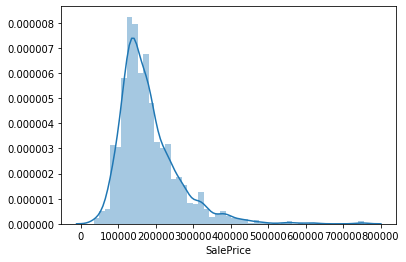

In [15]:
sns.distplot(data_train['SalePrice']);

#### Observations: 
1. Deviate from the normal distribution.
2. Have positive skewness.
3. Show peakedness.

In [16]:
#skewness and kurtosis
print("Skewness: %f" % data_train['SalePrice'].skew())
print("Kurtosis: %f" % data_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


<b> Observation:</b>

## Step 2 - Follow intuition to examine a small number of independent variables 

### Relationship between dependent variable and numerical independent variables

In [17]:
#scatter plot grlivarea/saleprice
def num_vars_relate(dataset, var, de_var):
    data = pd.concat([dataset[de_var], dataset[var]], axis=1)
    data.plot.scatter(x=var, y=de_var, ylim=(0,800000));

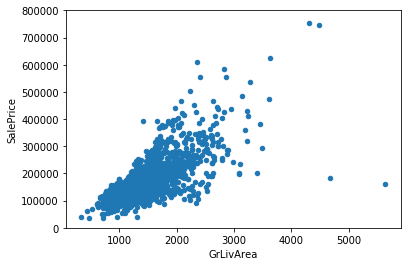

In [18]:
de_var = 'SalePrice'
num_vars_relate(data_train,'GrLivArea', de_var)

<b>Observation: </b> Linear relationship

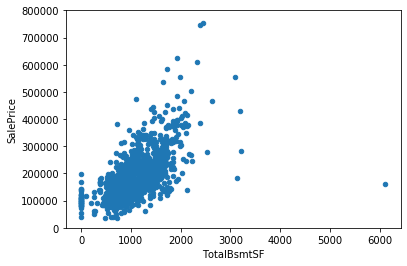

In [19]:
num_vars_relate(data_train,'TotalBsmtSF', de_var)

<b>Observation: </b> strong linear (exponential?) and 0 for some values of both variables.

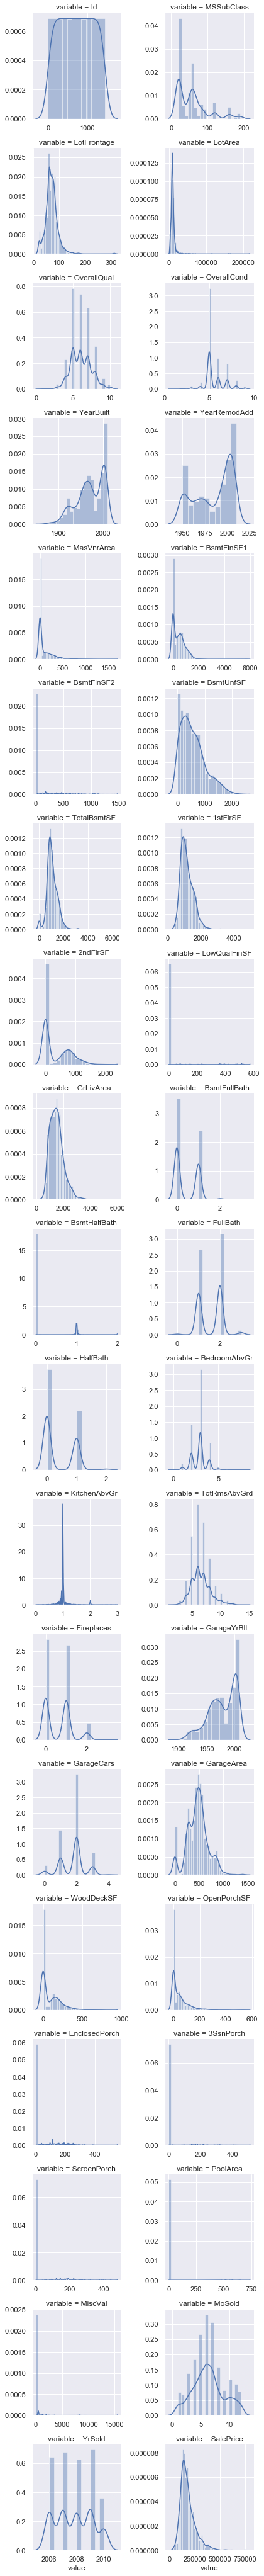

In [123]:
quantitative = [v for v in data_train.columns if data_train.dtypes[v] == 'int' or data_train.dtypes[v] == 'float']
f = pd.melt(data_train, value_vars=quantitative)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

### Relationship between dependent variable and categorical independent variables

#### For categorical data:

In [20]:
#box plot overallqual/saleprice
def cat_vars_relate(dataset, ind_var, de_var):
    data = pd.concat([dataset[de_var], dataset[ind_var]], axis=1)
    f, ax = plt.subplots(figsize=(8, 6))
    fig = sns.boxplot(x=ind_var, y=de_var, data=data)
    fig.axis(ymin=0, ymax=800000);

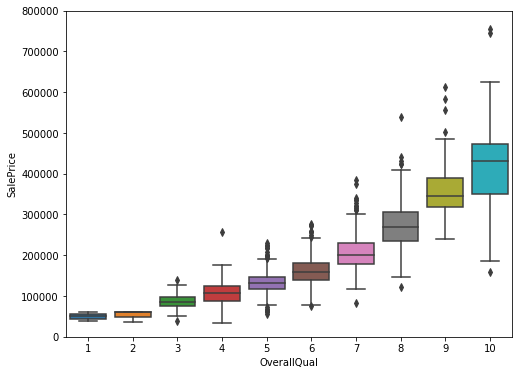

In [21]:
cat_vars_relate(data_train, 'OverallQual', de_var)

### Relationship with Time Series varibale

In [22]:
def time_series_relate(dataset, var, de_var):
    data = pd.concat([dataset[de_var], dataset[var]], axis=1)
    f, ax = plt.subplots(figsize=(24, 10))
    fig = sns.boxplot(x=var, y=de_var, data=data)
    fig.axis(ymin=0, ymax=800000);
    plt.xticks(rotation=90);

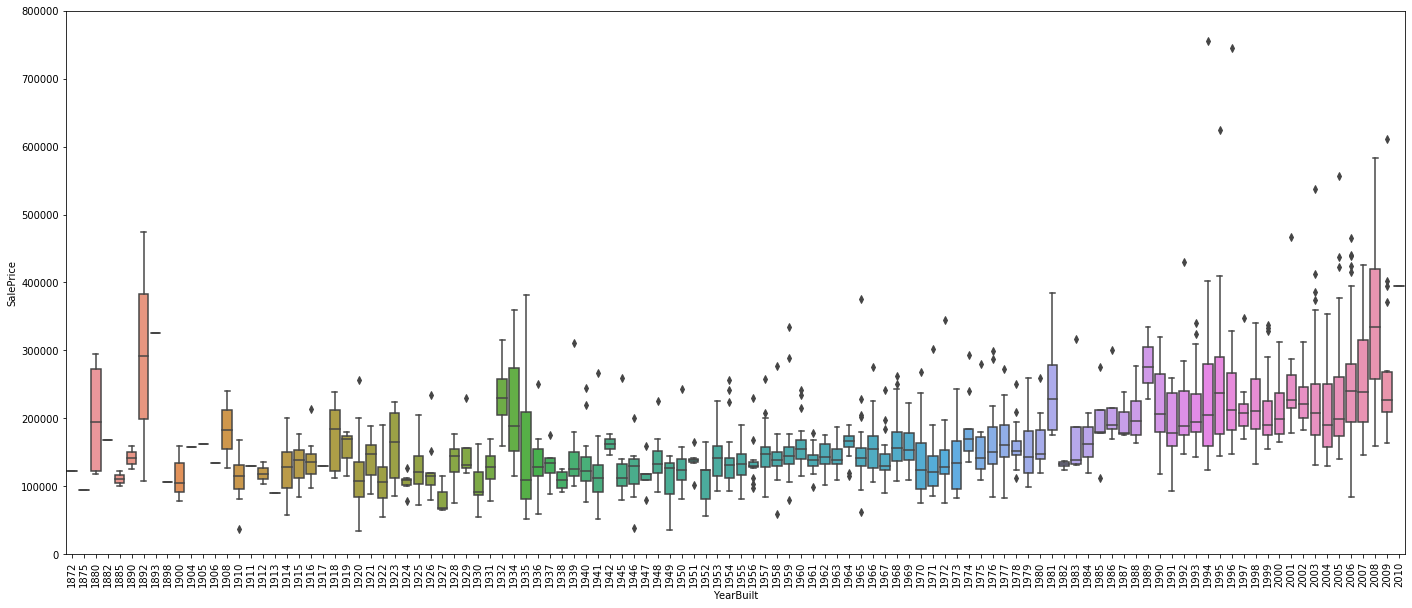

In [23]:
time_series_relate(data_train, 'YearBuilt', de_var)

<b>Observations: </b> As expected, the older buildings will be prized less than the modern ones. 

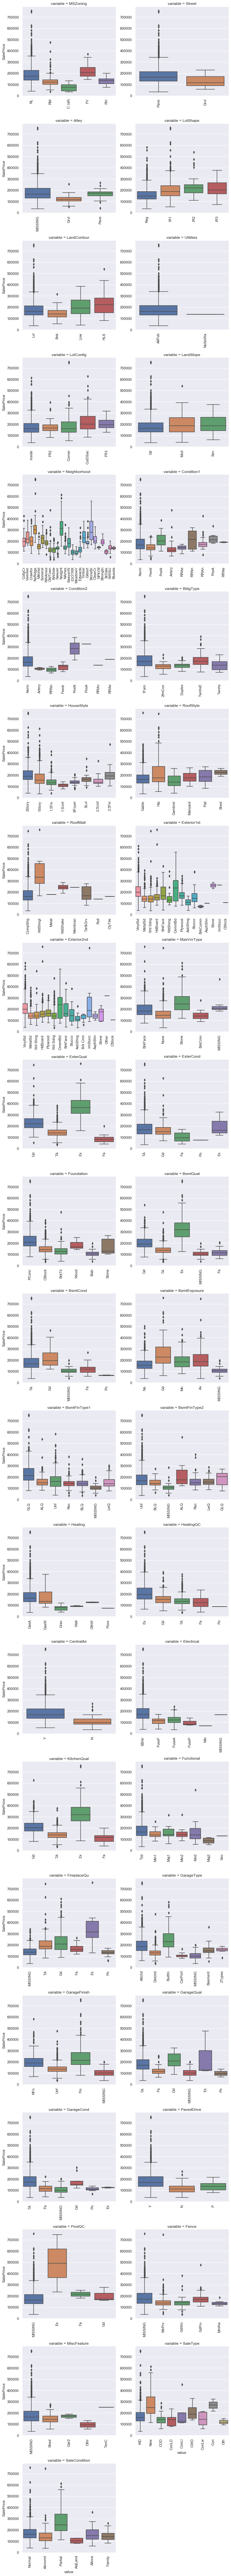

In [117]:
for c in qualitative:
    data_train[c] = data_train[c].astype('category')
    if data_train[c].isnull().any():
        data_train[c] = data_train[c].cat.add_categories(['MISSING'])
        data_train[c] = data_train[c].fillna('MISSING')

def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
f = pd.melt(data_train, id_vars=['SalePrice'], value_vars=qualitative)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "SalePrice")

<b>Observations: </b> 

### Summary:
- 'GrLivArea' and 'TotalBsmtSF' seem to be linearly related with 'SalePrice'. Both relationships are positive, which means that as one variable increases, the other also increases. In the case of 'TotalBsmtSF', we can see that the slope of the linear relationship is particularly high.
- 'OverallQual' and 'YearBuilt' also seem to be related with 'SalePrice'. The relationship seems to be stronger in the case of 'OverallQual', where the box plot shows how sales prices increase with the overall quality.

## Step 3: Split dataset into two
1. Numerical:   Num_data
2. Categorical: Cat_data

In [24]:
#38 Numerical , 43 categorical
num_data = data_train[list(Num_df.columns)]; cat_data = data_train[list(Cat_df.columns)]; 
cat_data = pd.concat([data_train[['Id']], cat_data], axis = 1)

In [25]:
num_data.sample(n=4)

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
1427  1428          50         60.0    10930            5            6   
665    666          60        106.0    11194            8            5   
1295  1296          20         70.0     8400            5            5   
1086  1087         160          NaN     1974            4            5   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  \
1427       1945          1950         0.0         580  ...           0   
665        2000          2000        40.0           0  ...         188   
1295       1968          1968       168.0        1016  ...         356   
1086       1973          1973         0.0         334  ...         120   

      OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
1427            0              0          0            0         0        0   
665           124              0          0            0         0        0   
1295            0              0          0            0         0        0   
1086           96              0          0            0         0        0   

      MoSold  YrSold  SalePrice  
1427       4    2008     140000  
665       11    2006     230500  
1295      11    2006     138500  
1086       5    2010      83500  

[4 rows x 38 columns]

In [26]:
cat_data.head(n=2)

Id MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
0   1       RL   Pave   NaN      Reg         Lvl    AllPub    Inside   
1   2       RL   Pave   NaN      Reg         Lvl    AllPub       FR2   

  LandSlope Neighborhood  ... GarageType GarageFinish GarageQual GarageCond  \
0       Gtl      CollgCr  ...     Attchd          RFn         TA         TA   
1       Gtl      Veenker  ...     Attchd          RFn         TA         TA   

  PavedDrive PoolQC Fence MiscFeature SaleType SaleCondition  
0          Y    NaN   NaN         NaN       WD        Normal  
1          Y    NaN   NaN         NaN       WD        Normal  

[2 rows x 44 columns]

#### Functions: 

## Step 4: Check the features with missing data 

#### Functions:

In [27]:
def table_miss(dataset):
    total = dataset.isnull().sum().sort_values(ascending=False)
    percent = (100*dataset.isnull().sum()/dataset.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

def plot_ranking_miss(dataset, th = 0, title = '', return_list = False):
    """
    Input: 
        dataset - A dataset to be evaluated
        th - In percentage, if the missing percentage is above the th, store in missing_th
    Display: A bar chart with the percentage of missing data over all variables in the dataset. 
    Output:
        missing:(pd.series) all variable with any missing data along with their percentage of missing. 
        missing_th:(pd.series) all variable with percentage missing data > th, along with their count of missing. 
    """
    missing = dataset.isnull().sum()
    missing = missing[missing > 0]
    missing_th = missing[100*missing/len(dataset) > th]
    missing = (missing/len(dataset))*100
    missing.sort_values(inplace=True)
    missing.plot.bar()
    plt.xlabel('Attributes');plt.ylabel('Percentage (%)'); plt.title(title)
    if return_list == True:
        return missing, missing_th

# Plot the percentage of Nan across attr, use this after using 'nan_counter' function.
def plot_percent_bar(nan_dict, th, x_label, y_label, title, scale_y = True):
    label = list(nan_dict.keys()); ys = list(nan_dict.values()); label_new = []
    for i in nan_dict.keys():
        label_new.append('') if nan_dict[i] == 0 else label_new.append(i)
    # this is for plotting purpose
    figure(num=None, figsize=(6, 4), dpi=80, facecolor='w', edgecolor='k')
    index = np.arange(len(label))
    plt.bar(index, ys, color="blue", align = 'center')
    plt.xlabel(x_label, fontsize=10); plt.ylabel(y_label, fontsize=10)
    plt.xticks(index, label_new, fontsize=10, rotation=90)
    plt.hlines(y=th, xmin=index[0]-0.5, xmax=len(nan_dict), color="r", linestyles="dashed")
    plt.title(title)
    if scale_y == True:
        plt.ylim(0, 100)
    plt.show()

    

#### For Numerical data

<b> Overall (Entire dataset): </b>

In [28]:
missing_all = table_miss(data_train)
missing_all.head(10)

Total    Percent
PoolQC         1453  99.520548
MiscFeature    1406  96.301370
Alley          1369  93.767123
Fence          1179  80.753425
FireplaceQu     690  47.260274
LotFrontage     259  17.739726
GarageCond       81   5.547945
GarageType       81   5.547945
GarageYrBlt      81   5.547945
GarageFinish     81   5.547945

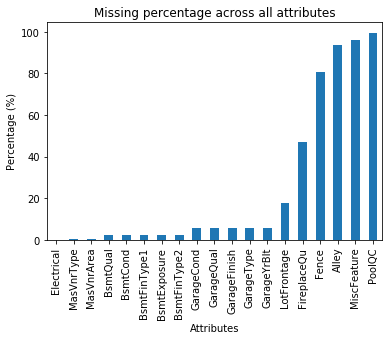

In [29]:
plot_ranking_miss(data_train, title = 'Missing percentage across all attributes')

<b> Numerical dataset </b>

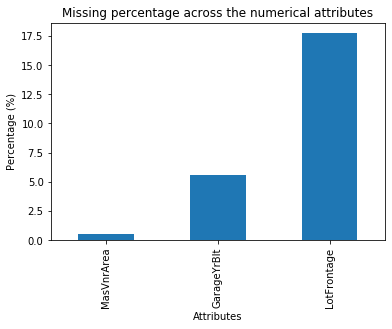

In [30]:
num_miss_list, num_missing_th = plot_ranking_miss(num_data, 10, \
                                title = 'Missing percentage across the numerical attributes', return_list = True)
num_miss_dict = num_miss_list.to_dict()

<b> Categorical dataset </b>

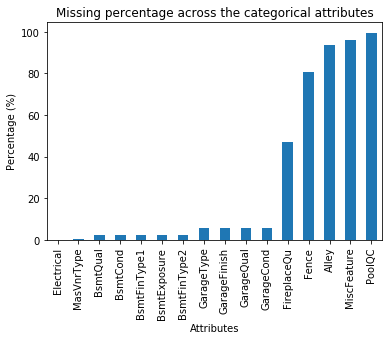

In [31]:
cat_miss_list, cat_missing_th = plot_ranking_miss(cat_data, 10, \
                                title = 'Missing percentage across the categorical attributes', return_list = True)
cat_miss_dict = cat_miss_list.to_dict()

#### Numerical dataset (Zoom-In)

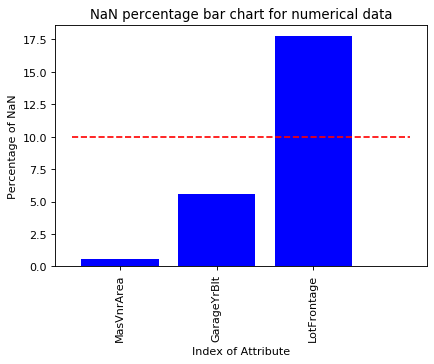

In [32]:
plot_percent_bar(num_miss_dict, 10, \
           'Index of Attribute', 'Percentage of NaN', 'NaN percentage bar chart for numerical data', scale_y = False)

#### Categorical dataset (Zoom-In)

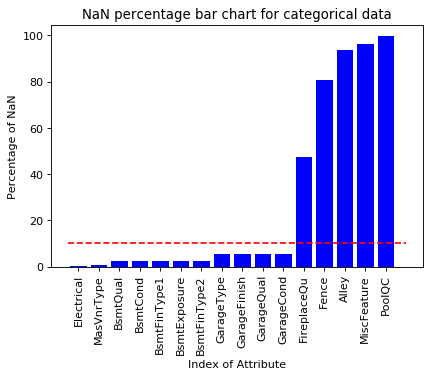

In [33]:
plot_percent_bar(cat_miss_dict, 10, \
           'Index of Attribute', 'Percentage of NaN', 'NaN percentage bar chart for categorical data', scale_y = False)

#### Remove the feautures with high percentage (>10%) of missing data 

In [34]:
cat_missing_th = cat_missing_th.index.to_list(); num_missing_th = num_missing_th.index.to_list()
# x_num_data = num_data[:]; x_cat_data  = cat_data[:]

In [35]:
print(num_data.shape); num_data = num_data.drop(num_missing_th, axis = 1)
print(num_data.shape)

(1460, 38)
(1460, 37)


In [36]:
print(cat_data.shape); cat_data = cat_data.drop(cat_missing_th, axis = 1)
print(cat_data.shape)

(1460, 44)
(1460, 39)


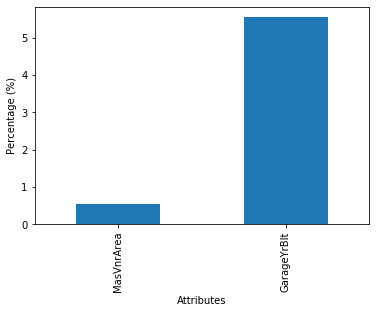

In [37]:
plot_ranking_miss(num_data)

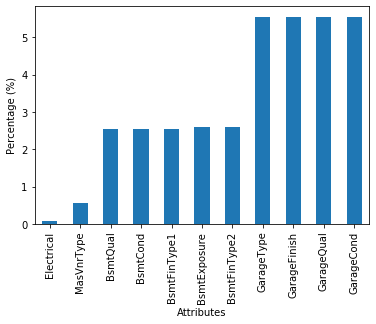

In [38]:
plot_ranking_miss(cat_data)

<b> Summary: </b>
- To handle missing data, we'll delete all the variables with missing data percentage above 10%, then impute the rest of the variables with missing data.

## Step 5: Check correlations

## Numerical

#### Functions:

In [39]:
# Correlations
def heatmap(var):
    f, ax = plt.subplots(figsize=(20, 12))
    sns.heatmap(var, linewidths=1, vmin=0, vmax=1, square=True)
    plt.show();

def bool_heatmap(corr, th):    
    save_list = []
    corr_ar = np.array(corr); corr_ar_bool = abs(np.array(corr)*0)
    for i in range(len(corr_ar)):
        for j in range(len(corr_ar)):
            if corr_ar[i][j] >= th:
                corr_ar_bool[i][j] = 1
                if i != j:
                    save_list.append((i,j))
    heatmap(corr_ar_bool)
    return save_list

#### Correlation matrix (heatmap)

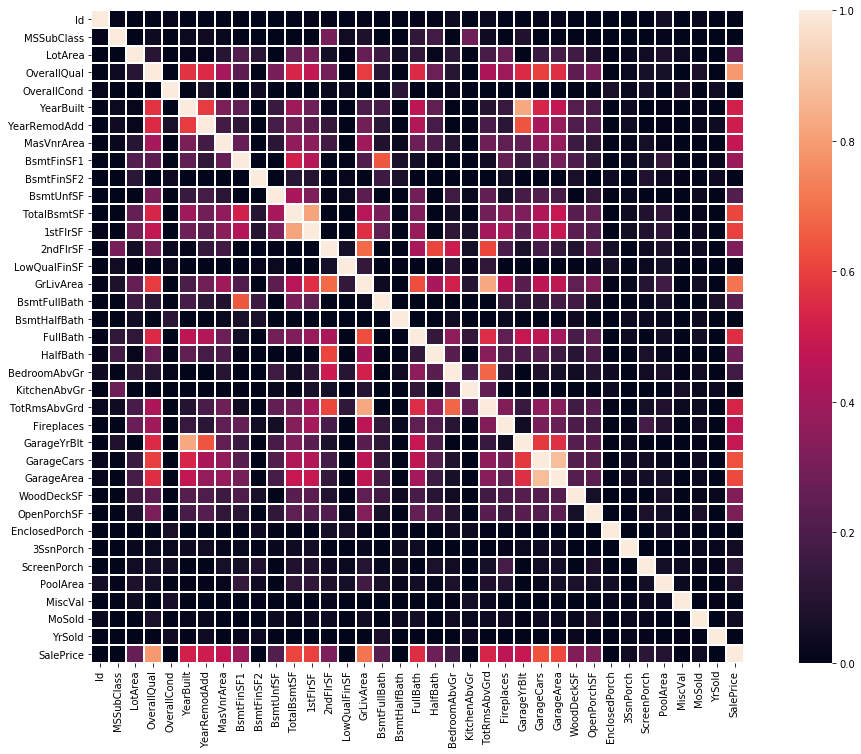

In [40]:
corr_num = num_data.corr(); heatmap(corr_num)

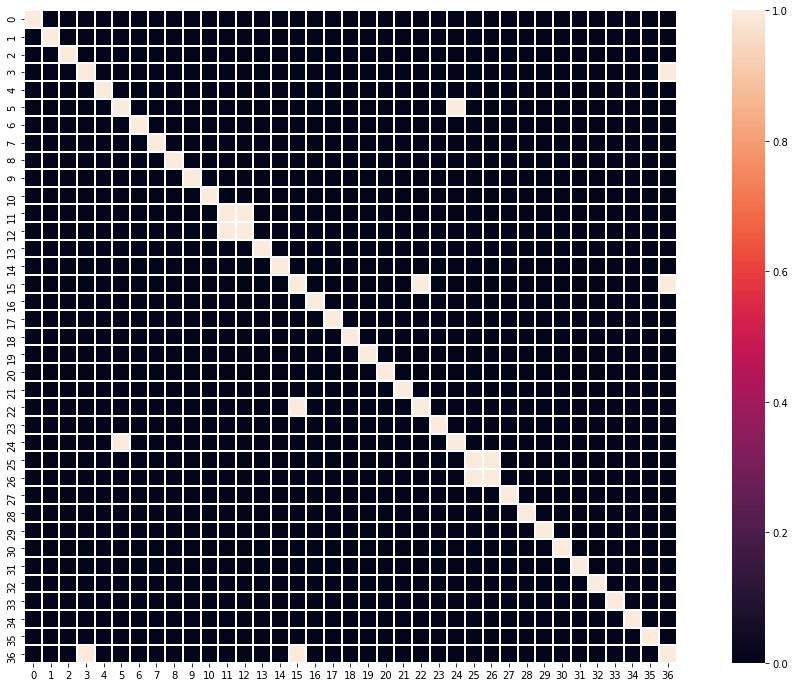

In [41]:
h_corr_list = bool_heatmap(corr_num, 0.7)

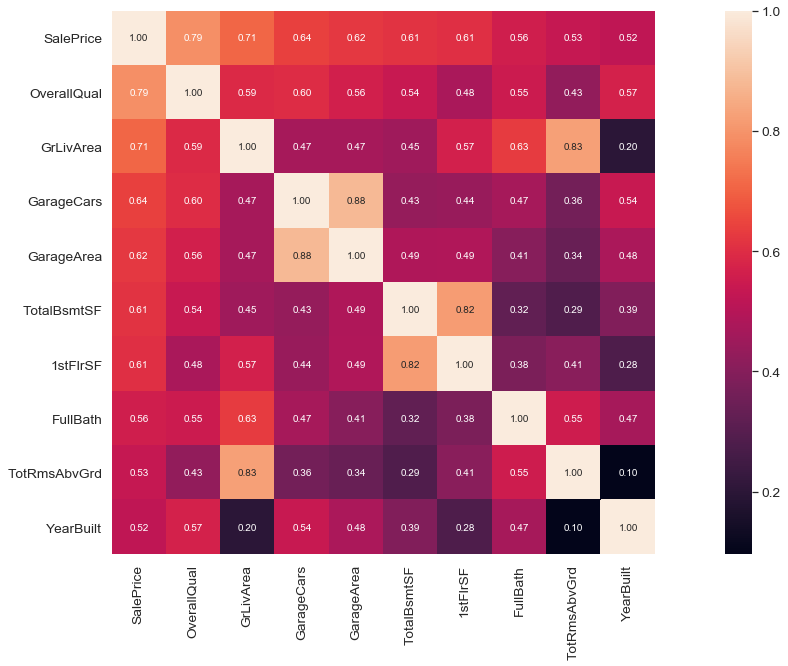

In [42]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corr_num.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(data_train[cols].values.T)
sns.set(font_scale=1.25)
plt.figure(figsize = (25,10))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

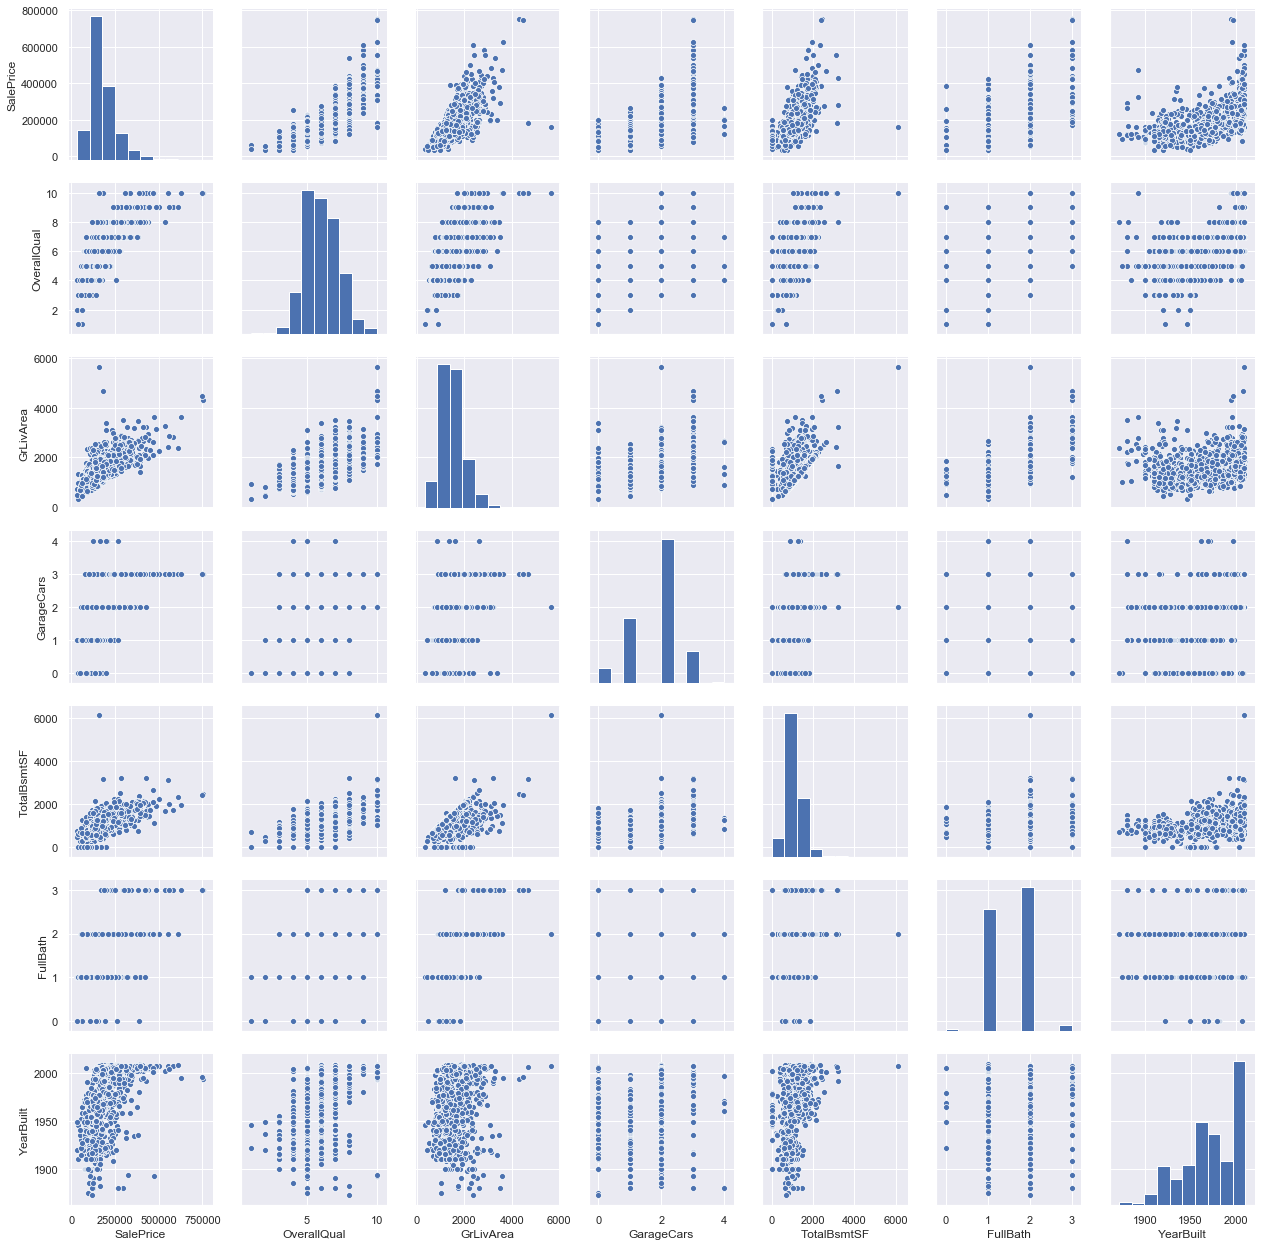

In [43]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(data_train[cols], size = 2.5)
plt.show();

<b> Observations: </b> 
- This scatter plot gives us a reasonable idea about variables relationships.
- For 'TotalBsmtSF' and 'GrLiveArea': Basement areas can be equal to the above ground living area, but it is not expected a basement area bigger than the above ground living area

## Categorical

### Anova for categorical variables statistical disparsity with the dependable variable
- Required: Assumption of normality
- ANOVA test if sets have similar distributions. 
- If variable has minor impact then set means should be equal. Decreasing pval is sign of increasing diversity in partitions.

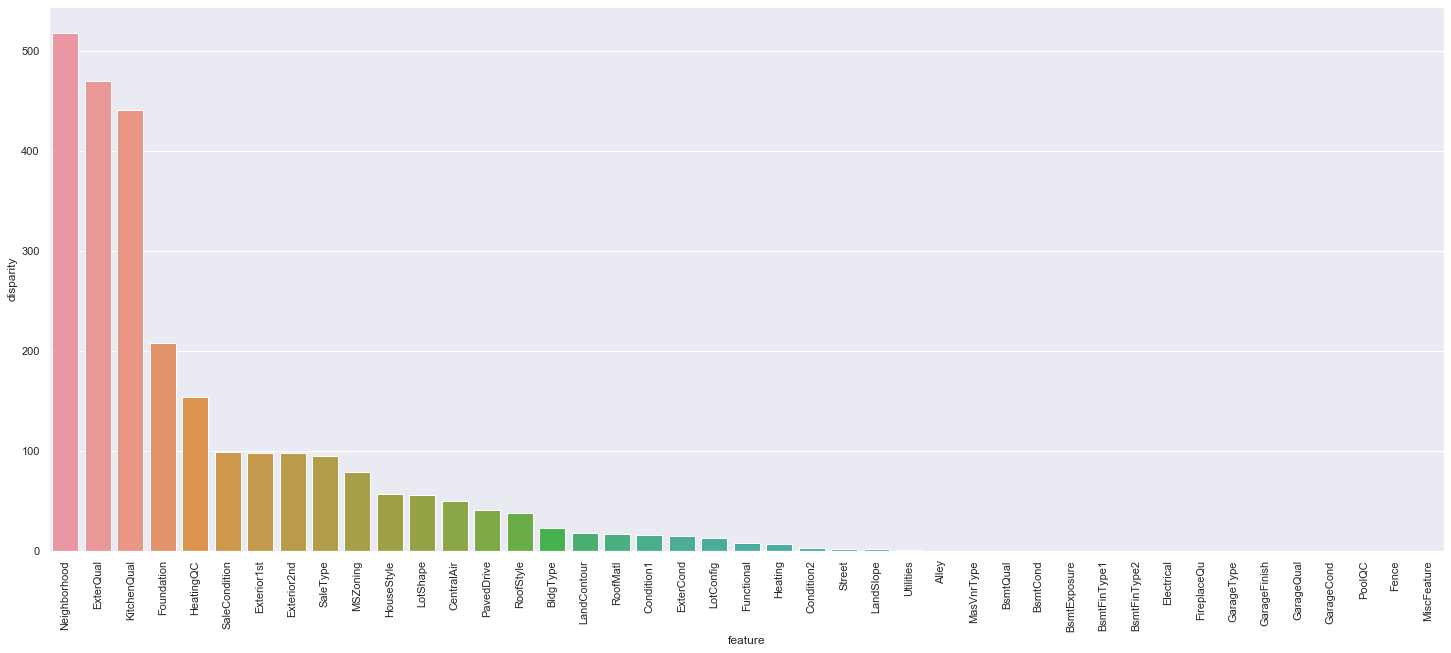

In [112]:
def anova(frame):
    anv = pd.DataFrame()
    anv['feature'] = qualitative
    pvals = []
    for c in qualitative:
        samples = []
        for cls in frame[c].unique():
            s = frame[frame[c] == cls]['SalePrice'].values
            samples.append(s)
        pval = stats.f_oneway(*samples)[1]
        pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

qualitative = [v for v in data_train.columns if data_train.dtypes[v] == 'object']
a = anova(data_train)
a['disparity'] = np.log(1./a['pval'].values)
plt.figure(figsize = (25,10))
sns.barplot(data=a, x='feature', y='disparity')
x=plt.xticks(rotation=90)

### Spearman for correlation between categorical variables with the dependable variable

##### Note: Only variables uncorrelated with each other should be added to regression models (which are correlated with SalePrice).

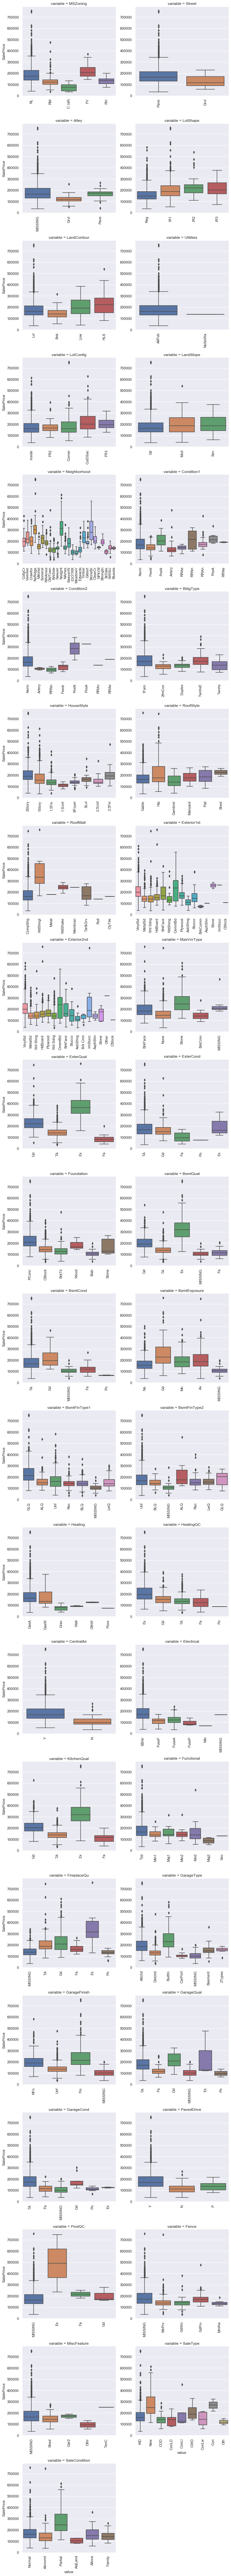

In [115]:
def spearman(frame, features):
    spr = pd.DataFrame()
    spr['feature'] = features
    spr['spearman'] = [frame[f].corr(frame['SalePrice'], 'spearman') for f in features]
    spr = spr.sort_values('spearman')
    plt.figure(figsize=(6, 0.25*len(features)))
    sns.barplot(data=spr, y='feature', x='spearman', orient='h')
    
features = quantitative + qual_encoded
spearman(train, features)

### Encode categorical variables & observe their correlations with the dependable variable)

#### Function:

In [142]:
def encode(frame, feature):
    ordering = pd.DataFrame()
    ordering['val'] = frame[feature].unique()
    ordering.index = ordering.val
    ordering['spmean'] = frame[[feature, 'SalePrice']].groupby(feature).mean()['SalePrice']
    ordering = ordering.sort_values('spmean')
    ordering['ordering'] = range(1, ordering.shape[0]+1)
    ordering = ordering['ordering'].to_dict()
    
    for cat, o in ordering.items():
        frame.loc[frame[feature] == cat, feature+'_E'] = o

In [140]:
qual_encoded = []
for q in qualitative:  
    encode(data_train, q)
    qual_encoded.append(q+'_E')
print(qual_encoded)

['MSZoning_E', 'Street_E', 'Alley_E', 'LotShape_E', 'LandContour_E', 'Utilities_E', 'LotConfig_E', 'LandSlope_E', 'Neighborhood_E', 'Condition1_E', 'Condition2_E', 'BldgType_E', 'HouseStyle_E', 'RoofStyle_E', 'RoofMatl_E', 'Exterior1st_E', 'Exterior2nd_E', 'MasVnrType_E', 'ExterQual_E', 'ExterCond_E', 'Foundation_E', 'BsmtQual_E', 'BsmtCond_E', 'BsmtExposure_E', 'BsmtFinType1_E', 'BsmtFinType2_E', 'Heating_E', 'HeatingQC_E', 'CentralAir_E', 'Electrical_E', 'KitchenQual_E', 'Functional_E', 'FireplaceQu_E', 'GarageType_E', 'GarageFinish_E', 'GarageQual_E', 'GarageCond_E', 'PavedDrive_E', 'PoolQC_E', 'Fence_E', 'MiscFeature_E', 'SaleType_E', 'SaleCondition_E']


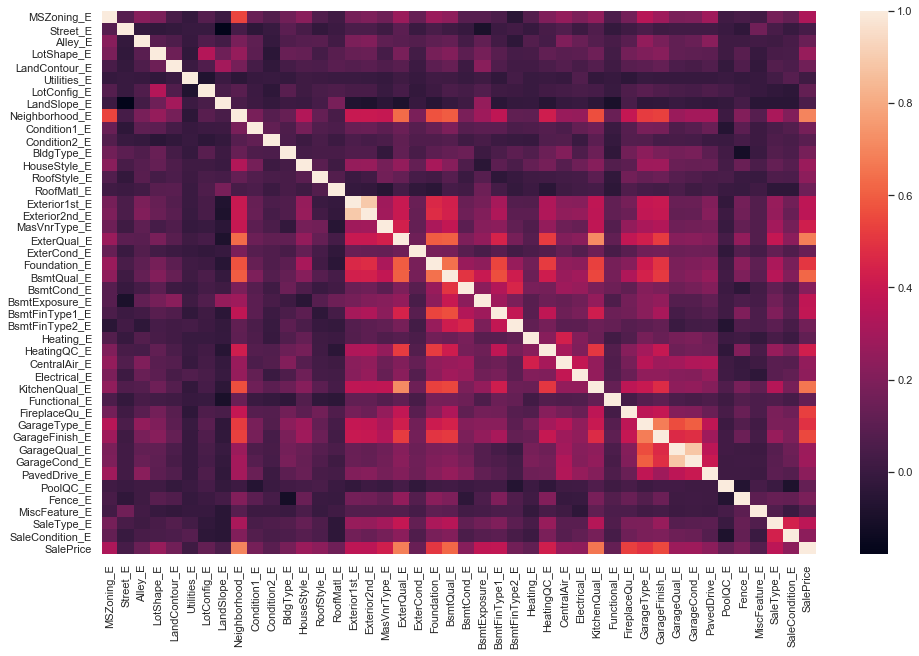

In [138]:
plt.figure(2, figsize = (16,10))
corr = data_train[qual_encoded+['SalePrice']].corr()
sns.heatmap(corr)

### Correlations between the numerical variables and categorical variables

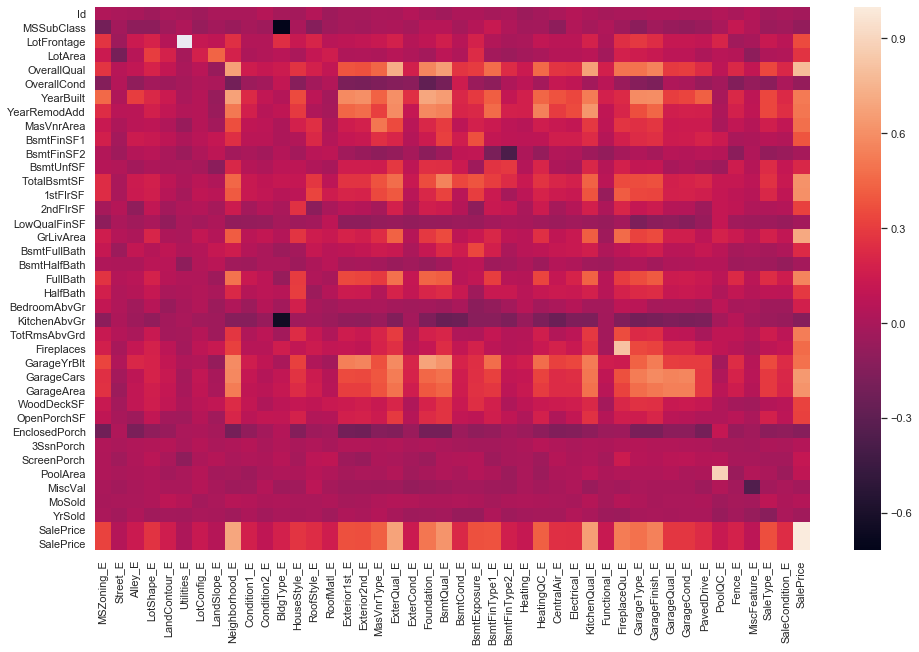

In [143]:
plt.figure(3, figsize = (16,10))
corr = pd.DataFrame(np.zeros([len(quantitative)+1, len(qual_encoded)+1]), index=quantitative+['SalePrice'], columns=qual_encoded+['SalePrice'])
for q1 in quantitative+['SalePrice']:
    for q2 in qual_encoded+['SalePrice']:
        corr.loc[q1, q2] = data_train[q1].corr(data_train[q2])
sns.heatmap(corr);

## Step 6: Outlier handlings

#### Univariate analysis (With standardization)

In [44]:
saleprice_scaled = StandardScaler().fit_transform(num_data['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83870376]
 [-1.83352844]
 [-1.80092766]
 [-1.78329881]
 [-1.77448439]
 [-1.62337999]
 [-1.61708398]
 [-1.58560389]
 [-1.58560389]
 [-1.5731    ]]

outer range (high) of the distribution:
[[3.82897043]
 [4.04098249]
 [4.49634819]
 [4.71041276]
 [4.73032076]
 [5.06214602]
 [5.42383959]
 [5.59185509]
 [7.10289909]
 [7.22881942]]


<b>Observations: </b> 
- Low range values are OK and not too far from 0.
- High range values are far from 0 and the 7+ values are far away from the crowd.

<b>Verdict:</b> No value should be removed.

#### Bivariate analysis

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


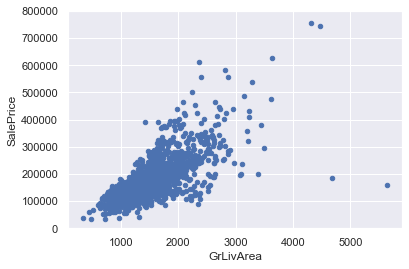

In [45]:
#bivariate analysis saleprice/grlivarea
num_vars_relate(num_data,'GrLivArea', de_var)

In [46]:
num_data.sort_values(by = 'GrLivArea', ascending = False)[:2]

Id  MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  \
1298  1299          60    63887           10            5       2008   
523    524          60    40094           10            5       2007   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  WoodDeckSF  \
1298          2008       796.0        5644           0  ...         214   
523           2008       762.0        2260           0  ...         208   

      OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
1298          292              0          0            0       480        0   
523           406              0          0            0         0        0   

      MoSold  YrSold  SalePrice  
1298       1    2008     160000  
523       10    2007     184750  

[2 rows x 37 columns]

In [47]:
num_data = num_data.drop(num_data[num_data['Id'] == 1299].index)
num_data = num_data.drop(num_data[num_data['Id'] == 524].index)
# Also drop in Cat_data
cat_data = cat_data.drop(num_data[cat_data['Id'] == 1299].index)
cat_data = num_data.drop(num_data[cat_data['Id'] == 524].index)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


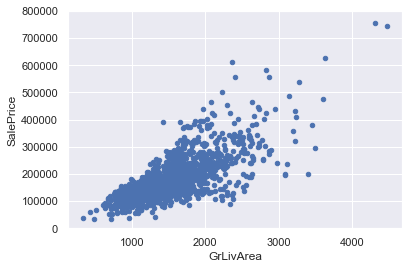

In [48]:
#bivariate analysis saleprice/grlivarea
num_vars_relate(num_data,'GrLivArea', de_var)

<b>Verdict:</b> Two datapoints are removed, the largest two in 'GrLivArea' dimension.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


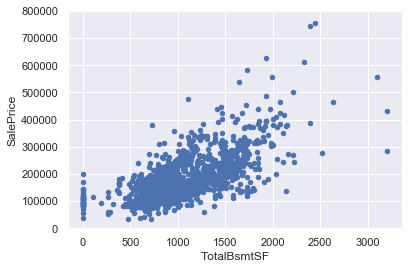

In [49]:
#bivariate analysis saleprice/TotalBsmtSF
num_vars_relate(num_data,'TotalBsmtSF', de_var)

In [50]:
num_data.sort_values(by = 'TotalBsmtSF', ascending = False)[:1]

Id  MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  \
332  333          20    10655            8            5       2003   

     YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  WoodDeckSF  \
332          2004       296.0        1124         479  ...           0   

     OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
332            0              0          0            0         0        0   

     MoSold  YrSold  SalePrice  
332      10    2009     284000  

[1 rows x 37 columns]

In [51]:
num_data = num_data.drop(num_data[num_data['Id'] == 333].index)
# Also drop in Cat_data
cat_data = cat_data.drop(num_data[cat_data['Id'] == 333].index)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


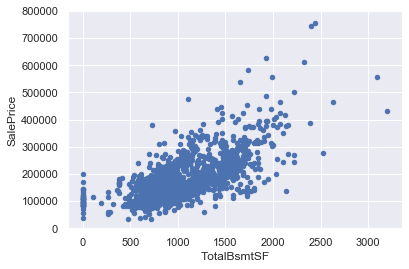

In [52]:
#bivariate analysis saleprice/TotalBsmtSF
num_vars_relate(num_data,'TotalBsmtSF', de_var)

<b>Verdict:</b> One datapoints are removed, the largest point in 'TotalBsmtSF' dimension.

## Step 7: Check the statistical assumptions

#### According to Hair et al. (2013), four assumptions should be tested:
- <b>Normality</b> - When we talk about normality what we mean is that the data should look like a normal distribution. This is important because several statistic tests rely on this (e.g. t-statistics). In this exercise we'll just check univariate normality for 'SalePrice' (which is a limited approach). Remember that univariate normality doesn't ensure multivariate normality (which is what we would like to have), but it helps. Another detail to take into account is that in big samples (>200 observations) normality is not such an issue. However, if we solve normality, we avoid a lot of other problems (e.g. heteroscedacity).

- <b>Linearity </b>- The most common way to assess linearity is to examine scatter plots and search for linear patterns. If patterns are not linear, it would be worthwhile to explore data transformations. 

- <b>Homoscedasticity</b> - I just hope I wrote it right. Homoscedasticity refers to the 'assumption that dependent variable(s) exhibit equal levels of variance across the range of predictor variable(s)' (Hair et al., 2013). Homoscedasticity is desirable because we want the error term to be the same across all values of the independent variables.

- <b>Absence of correlated errors </b>- Correlated errors, like the definition suggests, happen when one error is correlated to another. For instance, if one positive error makes a negative error systematically, it means that there's a relationship between these variables. This occurs often in time series, where some patterns are time related. 
    - We'll also not get into this. However, if you detect something, try to add a variable that can explain the effect you're getting. That's the most common solution for correlated errors.

### Normality

### Overview:

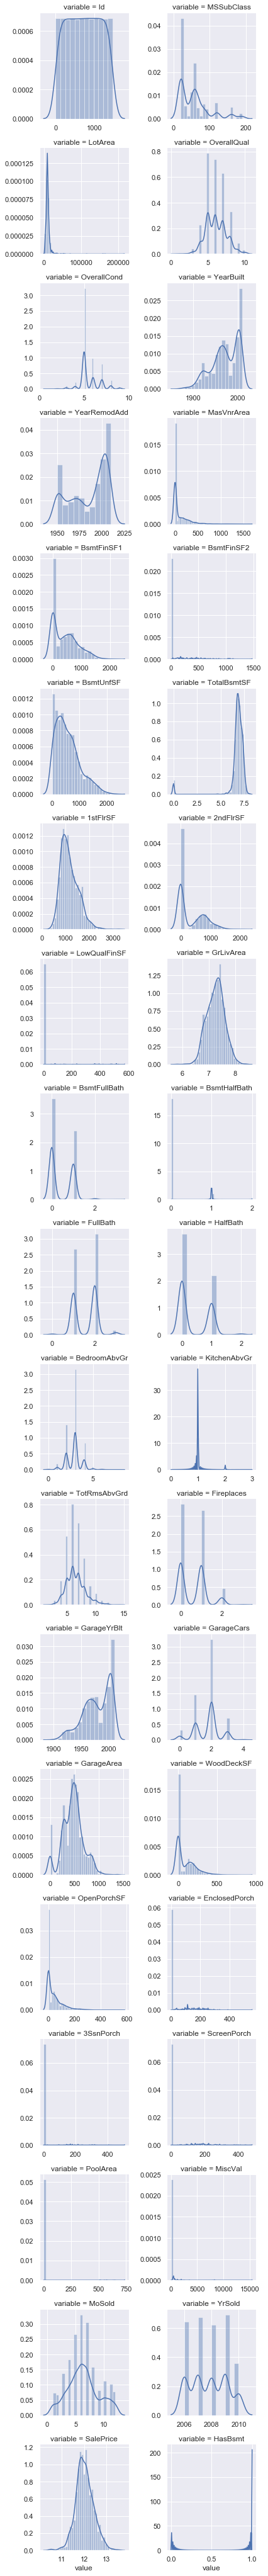

In [102]:
quantitative = [v for v in num_data.columns if num_data.dtypes[v] != 'object']
f = pd.melt(num_data, value_vars=quantitative)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

<b>Observations: </b> 
- Most distributions are not normal
- There are some bimodal distributions

<b>Potential Question: </b>
How to determine which transformation is best among the
a)Log b)Johnson c)Box Cox Power transformation. <br>For (c): https://www.isixsigma.com/tools-templates/normality/making-data-normal-using-box-cox-power-transformation/

#### Dependent Variable

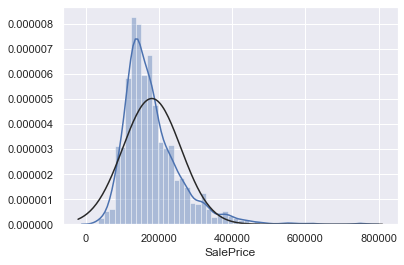

<Figure size 432x288 with 0 Axes>

In [53]:
#histogram and normal probability plot
sns.distplot(num_data['SalePrice'], fit=norm);
fig = plt.figure()

<b>Observations:</b>
- The black curve (normal distribution) doesn't match with the blue curve (the data distribution).

#### Fit dependent variable with the most likely distribution (Tried out: Johnson SU, Normal, Log Normal)

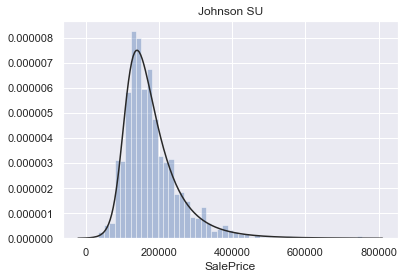

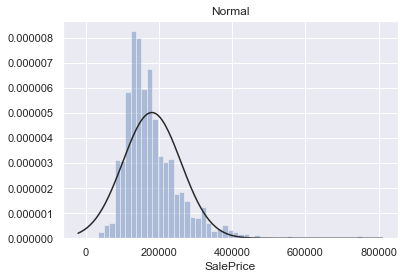

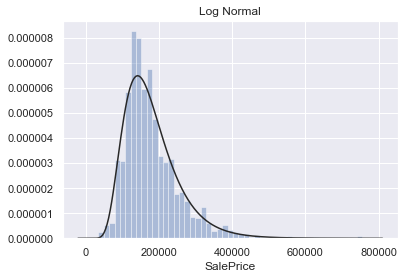

In [54]:
y = num_data['SalePrice']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=stats.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=stats.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=stats.lognorm)

<b>Observations: </b> 
- 'SalePrice' is not normal, but rather showing "Johnson" distribution. 
    - Because it shows 'peakedness', positive skewness and does not follow the diagonal line.

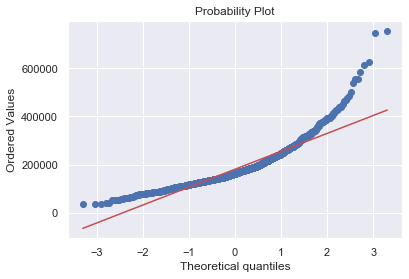

In [55]:
res = stats.probplot(num_data['SalePrice'], plot=plt)

#### Verdict:
- The probability plot is desired if it is closer to a stringt line. 
    - Therefore, log transformation is useful to convert the exponential shape of probability plot.

In [56]:
#applying log transformation
num_data['SalePrice'] = np.log(num_data['SalePrice'])

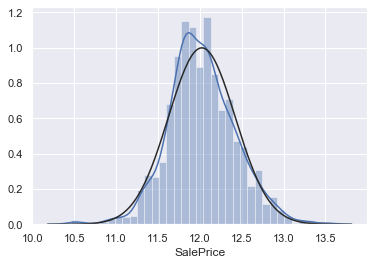

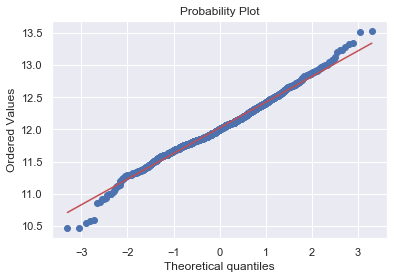

In [57]:
#histogram and normal probability plot
sns.distplot(num_data['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(num_data['SalePrice'], plot=plt)

#### Independent Variables

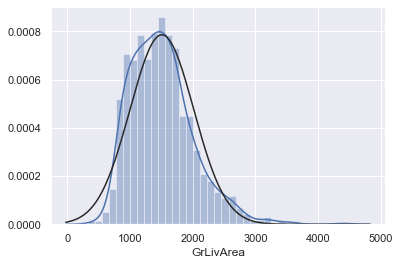

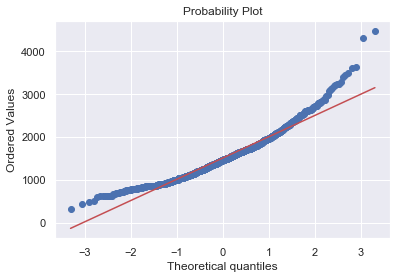

In [58]:
sns.distplot(num_data['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(num_data['GrLivArea'], plot=plt)

In [59]:
#applying log transformation
num_data['GrLivArea'] = np.log(num_data['GrLivArea'])

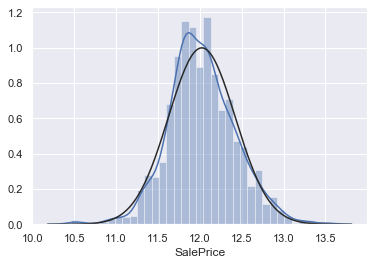

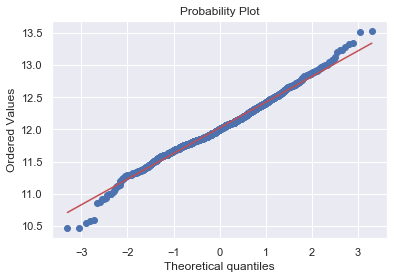

In [60]:
#histogram and normal probability plot
sns.distplot(num_data['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(num_data['SalePrice'], plot=plt)

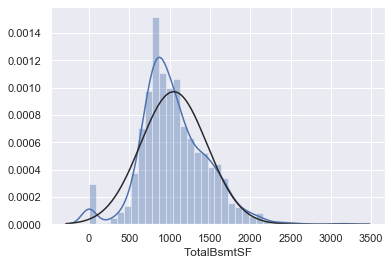

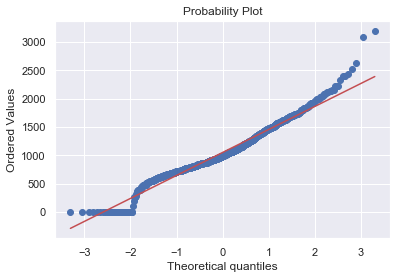

In [61]:
#histogram and normal probability plot
sns.distplot(num_data['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(num_data['TotalBsmtSF'], plot=plt)

<b>Remarks:</b>

1. A significant number of observations with value zero (houses without basement).
2. A big problem because the value zero doesn't allow us to do log transformations.
3. To apply a log transformation here, we'll create a variable that can get the effect of having or not having basement (binary variable). Then, we'll do a log transformation to all the non-zero observations, ignoring those with value zero. 

This way we can transform data, without losing the effect of having or not basement.

In [62]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
num_data['HasBsmt'] = pd.Series(len(num_data['TotalBsmtSF']), index=num_data.index)
num_data['HasBsmt'] = 0 
num_data.loc[num_data['TotalBsmtSF']>0,'HasBsmt'] = 1

In [63]:
#transform data
num_data.loc[num_data['HasBsmt']==1,'TotalBsmtSF'] = np.log(num_data['TotalBsmtSF'])

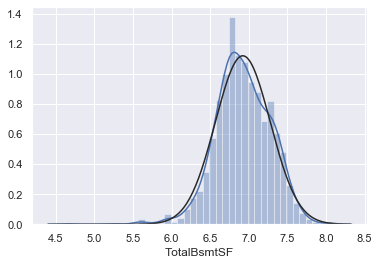

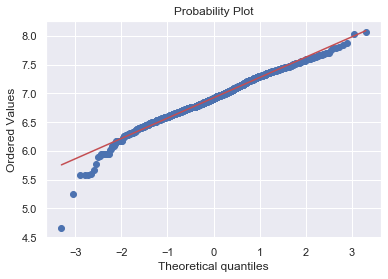

In [95]:
#histogram and normal probability plot
sns.distplot(num_data[num_data['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(num_data[num_data['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

### Linearity

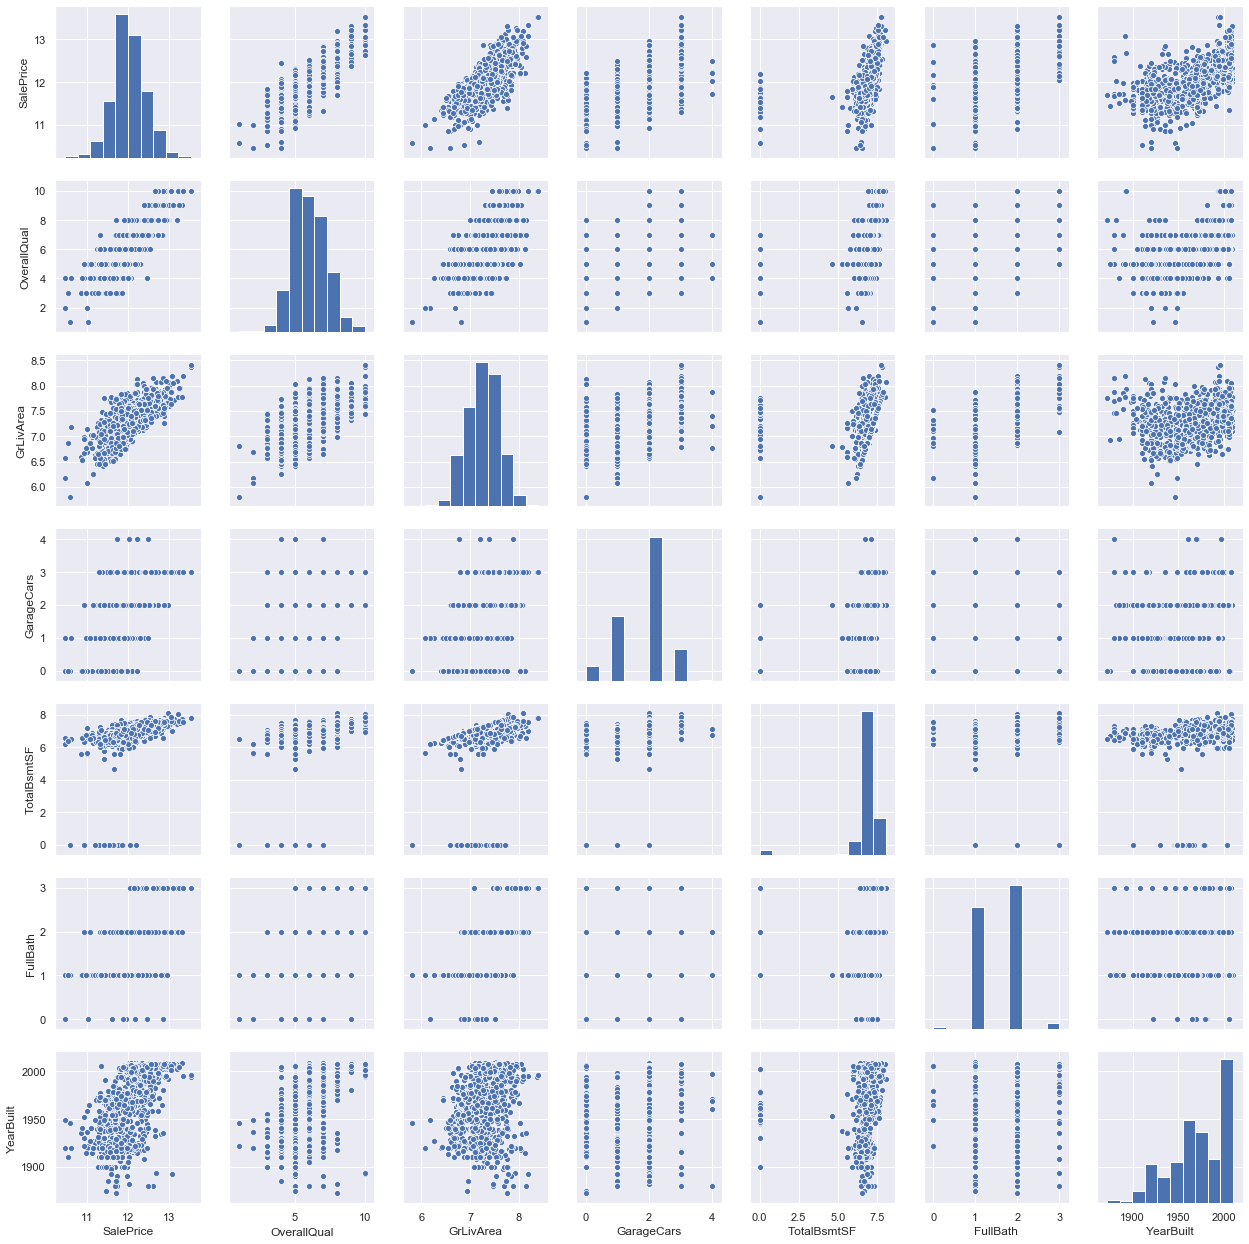

In [98]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(num_data[cols], size = 2.5)
plt.show();

### Homoscedasticity

The best approach to test homoscedasticity for two metric variables is graphically. Departures from an equal dispersion are shown by such shapes as cones (small dispersion at one side of the graph, large dispersion at the opposite side) or diamonds (a large number of points at the center of the distribution).

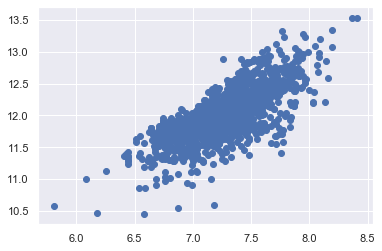

In [65]:
#scatter plot
plt.scatter(num_data['GrLivArea'], num_data['SalePrice']);

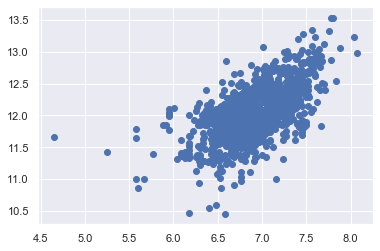

In [66]:
#scatter plot
plt.scatter(num_data[num_data['TotalBsmtSF']>0]['TotalBsmtSF'], num_data[num_data['TotalBsmtSF']>0]['SalePrice']);

## Step 8 : Create dummy variables

In [67]:
cat_dum_train = pd.get_dummies(cat_data)
print('Original data shape:{}, Dummy variable data shape{}'.format(cat_data.shape, cat_dum_train.shape))

Original data shape:(1458, 37), Dummy variable data shape(1458, 37)


In [68]:
num_dum_train = pd.get_dummies(num_data)
#Expected below to be the same
print('Original data shape:{}, Dummy variable data shape{}'.format(num_data.shape, num_dum_train.shape))

Original data shape:(1457, 38), Dummy variable data shape(1457, 38)


#### Concatenate original categorical dataset with dummy variables

In [73]:
new_cat_data = pd.concat([cat_data, cat_dum_train], axis = 1)
new_cat_data.info(verbose = False); new_cat_data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1459
Columns: 74 entries, Id to SalePrice
dtypes: float64(4), int64(70)
memory usage: 854.3 KB


Id  MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0   1          60     8450            7            5       2003          2003   
1   2          20     9600            6            8       1976          1976   
2   3          60    11250            7            5       2001          2002   
3   4          70     9550            7            5       1915          1970   
4   5          60    14260            8            5       2000          2000   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  WoodDeckSF  OpenPorchSF  \
0       196.0         706           0  ...           0           61   
1         0.0         978           0  ...         298            0   
2       162.0         486           0  ...           0           42   
3         0.0         216           0  ...           0           35   
4       350.0         655           0  ...         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000  

[5 rows x 74 columns]

<b>Potential Question: </b> 
- Why didn't we use one hot encoding?

## Step 9: Export data

In [87]:
print('Numerical'); print(num_data.info(verbose = False))
print('\nCategorical'); print(new_cat_data.info(verbose = False))

Numerical
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1457 entries, 0 to 1459
Columns: 38 entries, Id to HasBsmt
dtypes: float64(5), int64(33)
memory usage: 483.9 KB
None

Categorical
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1459
Columns: 74 entries, Id to SalePrice
dtypes: float64(4), int64(70)
memory usage: 854.3 KB
None


In [94]:
new_cat_data.tail(2)

Id  MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  \
1458  1459          20     9717            5            6       1950   
1459  1460          20     9937            5            6       1965   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  WoodDeckSF  \
1458          1996         0.0          49        1029  ...         366   
1459          1965         0.0         830         290  ...         736   

      OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
1458            0            112          0            0         0        0   
1459           68              0          0            0         0        0   

      MoSold  YrSold  SalePrice  
1458       4    2010     142125  
1459       6    2008     147500  

[2 rows x 74 columns]

In [92]:
num_data.tail(2)

Id  MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  \
1458  1459          20     9717            5            6       1950   
1459  1460          20     9937            5            6       1965   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  OpenPorchSF  \
1458          1996         0.0          49        1029  ...            0   
1459          1965         0.0         830         290  ...           68   

      EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  \
1458            112          0            0         0        0       4   
1459              0          0            0         0        0       6   

      YrSold  SalePrice  HasBsmt  
1458    2010  11.864462        1  
1459    2008  11.901583        1  

[2 rows x 38 columns]

In [70]:
new_cat_data.to_csv('Gen_Dataset/Cat_data_0.csv')
num_data.to_csv('Gen_Dataset/Num_data_0.csv')

## Step X: EDA Report 
- Data Description
    - Textual and Statistical descriptions have been recorded. (Refer to the beginning of this notebook) 
- Missing data handling
    - Variables with missing data percentage > 10% have been removed.
    - The rest of the variables with missing data have been imputed. 
- Split of dataset
    - Dataset has been splitted into numerical and categorical. Different approaches were used for the datasets due to their difference in nature. (i.e. distribution, scatterplot vs boxplot, dummy variables)
- Outliers removal 
    - The difference of mean and median of each variable has been used as an indicator for outliers.
    - The dependable variable and independent variables which are high correlated with the dependent variable have also been checked by inspection of their scatter plots, this is due to their significance in the dataset.
    - Some outliers have been removed based on inspection of variables with high correlation with dependent variabe (Hand-picked). Decisions were made based on assessment of each selected variable.
    - Possible improvement: The use of Tuckey's fences? But this removal decision also depends on the shape of the scatter plot.
- Collinearity
    - One of each highly correlated feautre pairs (corr > 0.7) was removed from the dataset. The feature with relatively lower correlation with the dependent varibale in each pair was chosen to be removed. 
- Check for statistical assumptions
    - Normality: The dependent variable follows Johnson's distribution rather than normal, its probability plot also display an exponential shape rather than a straight line. So log transformation was used.
    - Linearity: Most of the scatter plots we've seen appear to have linear relationships.
    
- Export Data
    - <b>Two CSV</b> files have been exported: Numerical (1459X38), Categorical (1459X74)

## Follow up questions:
1. Shall we use clustering to infer insights?
2. Can creating of quadratic features for some variables be helpful? 
    - Can we elaborate what made you decide which features should be made quadratic?
3. Why didnt we one hot encoding?
    - Because of many features, using one hot encoding will rapidly increase the dimension of feature, which increase the possibility of overfitting.
4. Why did we set 10% as threshold for missing percentage?
5. Should we assume that the residual is normally distributed vs. explanatory variables in multi-variate regression?
    - It is a common misbelief that the outcome variable in linear regression needs to be normally distributed. Only residuals need to be normally distributed.
    - in linear regression, we only assume the residuals are distributed IID normal distributed. 
        - Under this assumptions on the data, cost function of least-squares in linear regression corresponds to finding the maximum likelihood estimate of theta.
    - Non-normality of the errors will have some impact on the precise p-values of the tests on coefficients etc. 
        - If the distribution is not too non-normal, the tests will still provide good approximations.
6. Why do we refer to scatter plots more than pair-plots?
    - Since there's no consistent continuity in the independent variables

## Reference:
[1] Hair, J.F., Ringle, C.M. and Sarstedt, M., 2013. Partial least squares structural equation modeling: Rigorous applications, better results and higher acceptance. Long range planning, 46(1-2), pp.1-12.

[2] Dormann, C.F., Elith, J., Bacher, S., Buchmann, C., Carl, G., Carré, G., Marquéz, J.R.G., Gruber, B., Lafourcade, B., Leitão, P.J. and Münkemüller, T., 2013. Collinearity: a review of methods to deal with it and a simulation study evaluating their performance. Ecography, 36(1), pp.27-46.


## What's next?
1. Data standardisation (StandardScaler())
2. TSNE, PCA, KMeans()
3. Ridge, LASSO, XGB
4. Evaluations
5. Results